In [1]:
# wine_hierarchical_clustering.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import adjusted_rand_score


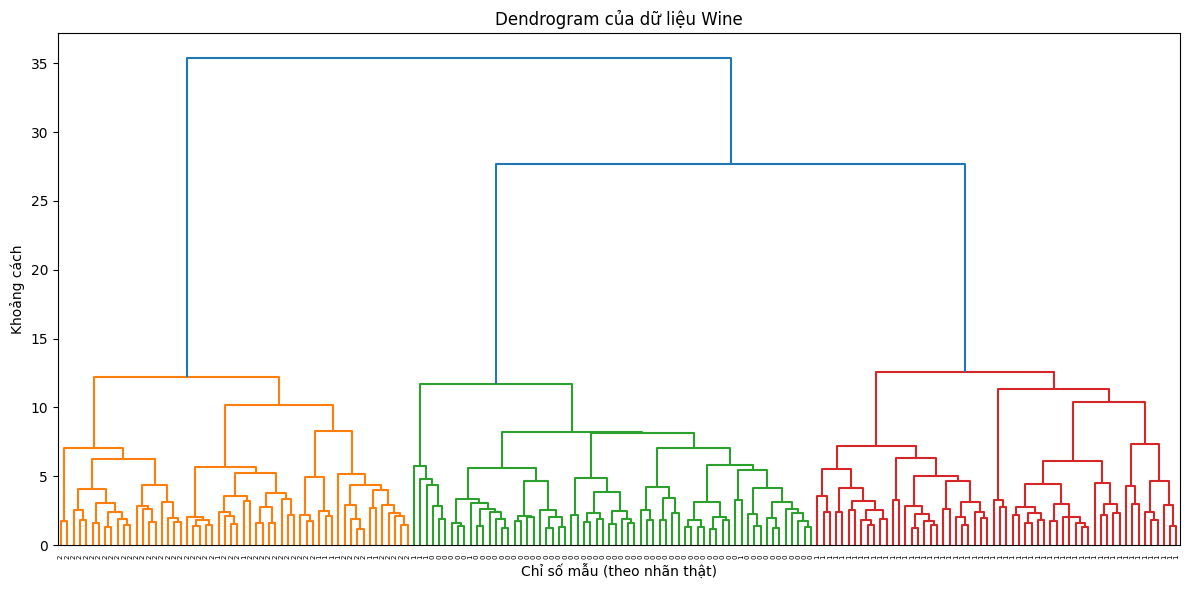

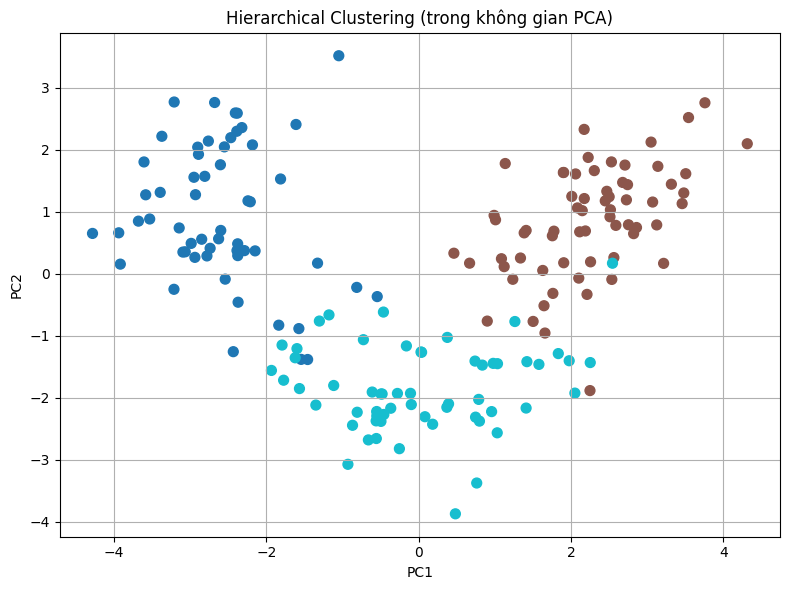

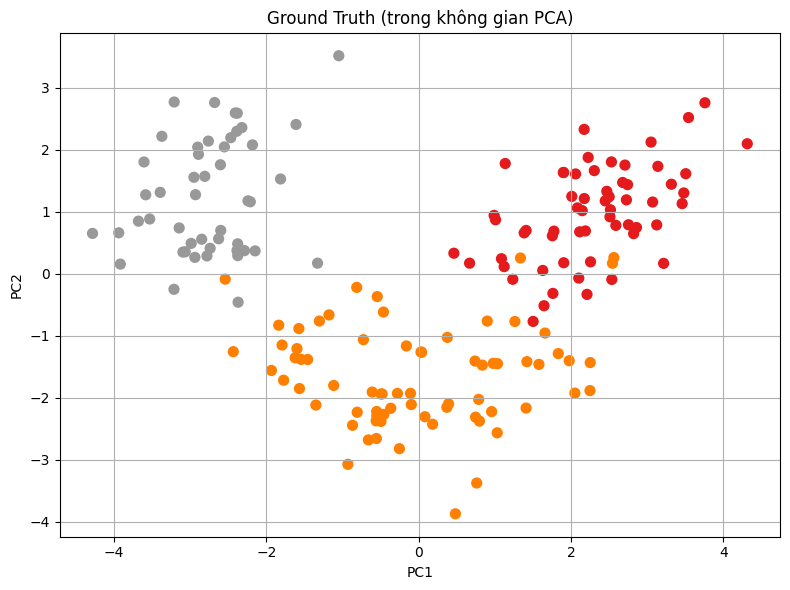

Adjusted Rand Index (ARI): 0.7899


In [2]:

# 1. Load Wine dataset
data = load_wine()
X = data.data  # shape (178, 13)
y_true = data.target  # 3 classes: 0, 1, 2
feature_names = data.feature_names

# 2. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Tính linkage và vẽ dendrogram
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z, labels=y_true)
plt.title("Dendrogram của dữ liệu Wine")
plt.xlabel("Chỉ số mẫu (theo nhãn thật)")
plt.ylabel("Khoảng cách")
plt.tight_layout()
plt.show()

# 4. Phân cụm với k=3 cụm
k = 3
clusters = fcluster(Z, k, criterion='maxclust')

# 5. Giảm chiều dữ liệu với PCA (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 6. Trực quan hóa kết quả phân cụm
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=50)
plt.title("Hierarchical Clustering (trong không gian PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Trực quan hóa nhãn thật
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='Set1', s=50)
plt.title("Ground Truth (trong không gian PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Tính ARI để đánh giá phân cụm
ari = adjusted_rand_score(y_true, clusters)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
